# RNN 


> **why we cannot used ANN or CNN for sequential data ?**

- the text data is not of same size.(each example can have the different lenght).

- and cnn or ann canot deal with the input of diff-diff lenght.

- what if convert the every smaple into same size but the amount of unsessary data that we gonna create is crazy not computer efficient at all.

- and also at the time of inferece if we input have diff length then the zero padding is also not gonna work.(i.e larger than out highest our training sample lenght)

- and one thing in ANN or CNN we pass the data at a same time this can cuase the big probelm. 

- cuase the meaining of sentence cann be change or look liek randome noise caues in text the most imp thing is the squence of the words.

- by design the ann cannot remember anything due it we lose the semantic meaning.

> **How RNN solve this problem ?** 

- rnn can handle the sequential data.(mostly text data).

- rnn has this feature due to it can remember the previous features.

> **RNN-Architecure**

- rnn vs ann

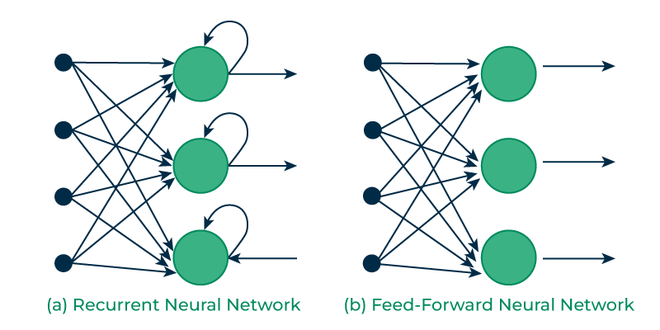

- the rnn look same as ann but the main diff is that self-feedback loop.

- there are three main arc -> 1. many to one , 2. One to many , 3. many to many.

- lets start our discussion with many to one.

- how rnn solve the ann probelm is withe system like self-feedback loop and time-stamp.(data processing)

- before passing our data into rnn we need to convert data into tokens(brekaing sentence into small chunks) then need to pass.(sequentail information saved). 

> **How RNN work ?**

1. Recurrent structure with a feedback loop

2. Maintain a hidden state as memory

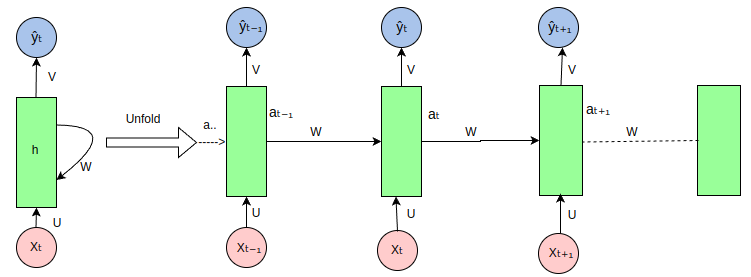

  -  the RNN starts with an initial hidden state.

  -  At each time step:
     - It receives an input xt
     
     - Updates the hidden state using the previous hidden state and current input
     - Produces an output yt based on the current hidden state
  - the process repeats for each element in the input sequence.


3. Process inputs sequentially
4. Update mechanism: h_t = tanh(W_hh * h_(t-1) + W_xh * x_t + b_h)

5. Output generation: y_t = softmax(W_hy * h_t + b_y)
6. Trained using Backpropagation Through Time (BPTT)

> **data preprocessing in rnn**

- Tokenization: Breaking text into smaller units (words, subwords, or characters).

- Vocabulary creation: a set of unique tokens.
- Encoding: Converting tokens to numerical representations (e.g., one-hot encoding or embeddings).

> **problem with rnn**


- Long sequences can lead to unstable gradients during training.

- The gradient dependencies increase significantly as the sequence length grows.
- For long sentences, as the model processes text, it starts to forget earlier parts.
- The model tends to generate output based only on the most recent tokens.
- The use of activation functions like tanh, which compress outputs to the range (0,1).
- As gradients are backpropagated, they are repeatedly multiplied by values between 0 and 1.
- This causes gradients for earlier time steps to become extremely small (vanishing) or occasionally explode to very large values.
- Vanishing gradients make it difficult for the network to learn long-term dependencies.
- The model struggles to connect information from distant parts of the input sequence.
- Training becomes ineffective for capturing long-range patterns.

> **Solutions and Improvements**


- Introduce gating mechanisms to control information flow.

- Better at capturing long-term dependencies.
- A simplified version of LSTMs with fewer parameters.
- Also effective at handling long-term dependencies.
- A technique to prevent exploding gradients by limiting their magnitude.
- Using ReLU or its variants can help mitigate the vanishing gradient problem.
- also we use attention mechnism it allow the model to focus on different parts of the input sequence, regardless of their position.

# Code 

In [1]:
import torch 
from torch import nn 

class RNNModel(nn.Module):


    def __init__(self, rnn_layer, **kwargs):
        super(RNNModel, self).__init__(**kwargs)
        self.rnn = rnn_layer
        if self.rnn.bidirectional:
            self.num_directions = 2
        else:
            self.num_directions = 1
        self.linear = nn.Linear(
            self.num_directions * self.rnn.hidden_size, self.rnn.input_size)

    # forward

    def forward(self, inputs, state):
        X = F.one_hot(inputs.T.long(), self.rnn.input_size)
        X = X.to(torch.float32)
        Y, state = self.rnn(X, state)
        output = self.linear(Y.reshape((-1, Y.shape[-1])))
        return output, begin_state


    #begin state

    def begin_state(self, device, batch_size=1):
        tensor = torch.zeros((self.num_directions * self.rnn.num_layers, 
                              batch_size, self.rnn.hidden_size), 
                             device=device)
        if isinstance(self.rnn, nn.LSTM):
            return (tensor, tensor) 
        else:
            return tensor


NameError: name 'nn' is not defined